In [ ]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy triton scipy ftfy spacy==3.4.4
     

# The xformers package is mandatory to be able to create several 768x768 images.
%pip install -q xformers==0.0.16rc425


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.4.4 which is incompatible.
    

In [31]:
# model_id = "stabilityai/stable-diffusion-2-1-base"
# model_id = "stabilityai/stable-diffusion-2-1"
# model_id = "dreamlike-art/dreamlike-photoreal-2.0"
# model_id = "dreamlike-art/dreamlike-anime-1.0"
model_id = "WarriorMama777/BloodOrangeMix"
     

from diffusers import PNDMScheduler, DDIMScheduler, LMSDiscreteScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler

# scheduler = None
# scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler")
scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = LMSDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")
     

import mediapy as media
import torch
from diffusers import StableDiffusionPipeline
import random

device = "cuda"

if model_id.startswith("stabilityai/"):
  model_revision = "fp16"
else:
  model_revision = None
  

if scheduler is None:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      torch_dtype=torch.float16,
      revision=model_revision,
      )  
else:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      scheduler=scheduler,
      torch_dtype=torch.float16,
      revision=model_revision,
      )

pipe = pipe.to(device)
pipe.enable_xformers_memory_efficient_attention()

if model_id.endswith('-base'):
  image_length = 512
else:
  image_length = 768

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/25 [00:00<?, ?it/s]

""

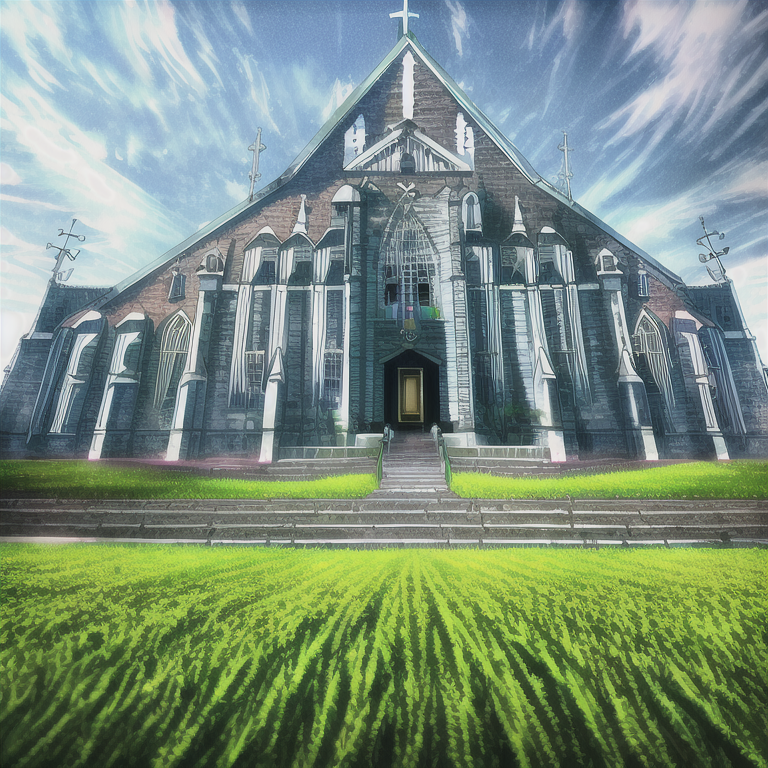

'Seed: 2134326083'

In [32]:
prompt = "photo, a church in the middle of a field of crops, bright cinematic lighting, gopro"
remove_safety = False
num_images = 1
seed = random.randint(0, 2147483647)

if remove_safety:
  negative_prompt = None
  pipe.safety_checker = None
else:
  negative_prompt = "nude, naked"

images = pipe(
    prompt,
    height = image_length,
    width = image_length,
    num_inference_steps = 25,
    guidance_scale = 9,
    num_images_per_prompt = num_images,
    negative_prompt = negative_prompt,
    generator = torch.Generator("cuda").manual_seed(seed)
    ).images
    
media.show_images(images)
display(f"Seed: {seed}")
images[0].save("output.jpg")